In [ ]:
# ..... plot cell type distribution for each stage ..... #

In [2]:
library(dplyr)
library(ggplot2)

In [3]:
# load data
get_anno_mtd <- function(currstage1){
    
    df1 = read.delim(paste0(currstage1, '_Knight-Schrijver_celltypes.csv'), sep = ',')
    df1$celltype = df1$final_celltype
    
    # convert only immature_other into subclass labels
    df1$celltype2 = df1$class
    df1$celltype2[df1$class=='Immature_other'] <- df1$celltype[df1$class=='Immature_other']    

    df1 <- df1[which(!is.na(df1$celltype2) & df1$celltype2!='unassigned'),]
    
    # remove cell types with <50 cells across all samples combined
    df1 <- df1[!(df1$celltype2 %in% names(which(table(df1$celltype2)<50))),]
    return(df1)
}

subs2 = c('Endocardial', 'Immature_Cardiomyocytes', 'Cardiomyocytes', 'Smooth_Muscle_Cells',  
          'Myeloid_Immune_Cells', 'Lymphoid_Immune_Cells', 'Pericytes_Stromal', 'Pericytes', 'Fibroblasts',
          'Endothelial_Arterial', 'Endothelial_Venous', 'Endothelial_Capillaries', 'Neuronal_Cells',
          'Immature_Endothelium', 'Immature_FB-like', 'Immature_Neuralcrest',
          'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating')

subcol2 = c('#29c5f6', '#f87cc3', '#d43035', '#e78b00',  
            '#cd7883', '#ff9aba', '#651f7e', '#643b9f', '#358957',
            '#dce775', '#574e3c', '#84b023', '#4900e6',
           '#fc6c85', '#a94064', '#c154c1',
           '#3a9bdc', '#5579c6', '#1260cc')

In [10]:
# get metadata
stage1 = 'stage21'
newdf = get_anno_mtd(stage1)
newdf[1,]

barcode                              class               celltype           
1 Stage_21_sample1A_AAACCCAAGATAACAC-1 Smooth_Muscle_Cells Smooth_Muscle_Cells
  final_celltype      celltype2          
1 Smooth_Muscle_Cells Smooth_Muscle_Cells

In [19]:
df = newdf %>% group_by(celltype2) %>% summarise(count = n())
df$col <- subcol2[match(df$celltype2, subs2)]
df[1:2,]

celltype2      count col    
1 Cardiomyocytes 1161  #d43035
2 Endocardial    3012  #29c5f6

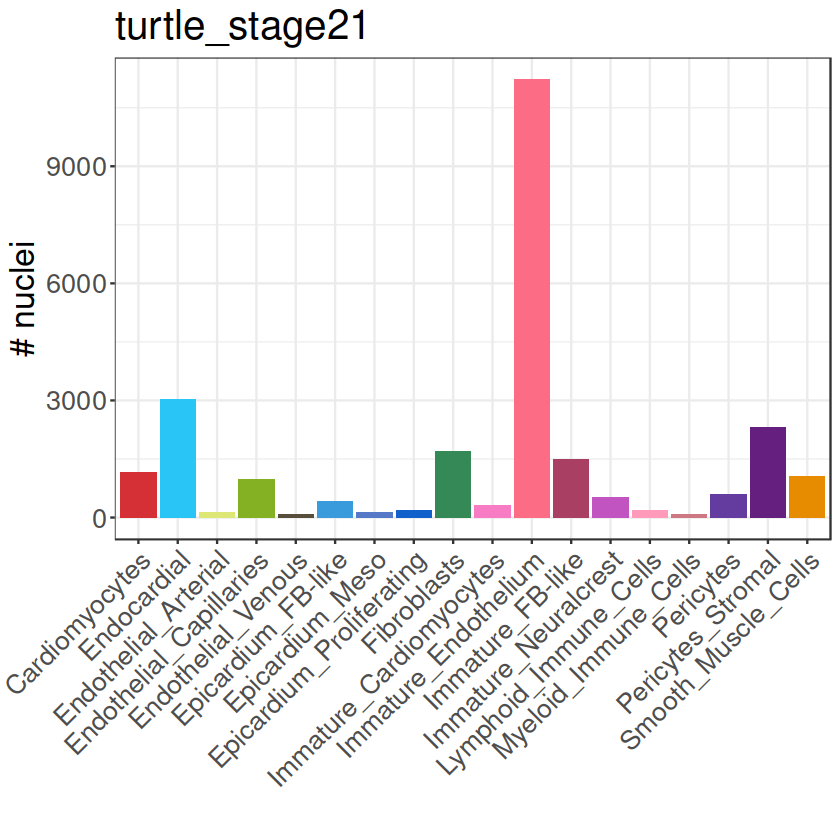

In [20]:
# png(paste0('aa-', stage1, '-numnuc-barplot.png'), width = 9, height = 7, res = 300, units = 'in')
ggplot(df, aes(x = celltype2, y = count, fill  = celltype2)) +
geom_bar(stat = "identity", fill = df$col) + #scale_y_continuous(trans='log10') + 
theme_bw() + xlab('') + ylab('# nuclei') + ggtitle(paste0('turtle_', stage1)) +
theme(text = element_text(size=20), axis.text.x = element_text(angle=45, hjust=1))
# dev.off()